In [1]:
#import important modulaes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import display
print("completed")

completed


In [2]:
#load data and show data head
data=pd.read_csv("Netflix_Titles.csv")
display(data.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#describe data
display(data.describe())

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


None

In [5]:
#check missing data
check_missing_data = data.isnull().sum()
display(check_missing_data)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
#remove null values and check it 
data.dropna(inplace = True)
check_missing_data = data.isnull().sum()
display(check_missing_data)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
#check repeated data
print("number of all data:-      ",len(data))
print("number of unique data:-   ",data["show_id"].nunique())
print("number of repeated data:- ",len(data)-data["show_id"].nunique())

number of all data:-       5332
number of unique data:-    5332
number of repeated data:-  0


 Most common show type :- Movie


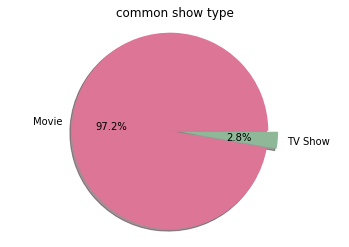

In [8]:
#common show type
show_type=data["type"].value_counts()
print (' Most common show type :- {0}' .format(show_type.index[0]))
plt.pie(show_type[0:len(show_type)],labels=show_type.index,colors = [ '#DD7596', '#8EB897']
,shadow=True,explode=[0.05]*len(show_type),autopct='%1.1f%%')
plt.title("common show type")
plt.axis("equal")
plt.show()  

the most popular director is:-  Raúl Campos, Jan Suter


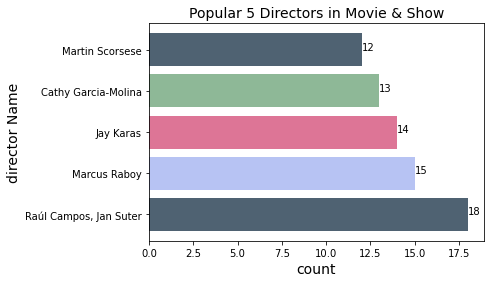

In [9]:
#the most popular director
common_direc=data['director'].value_counts()
print("the most popular director is:- ",common_direc.index[0])
x=common_direc[0:5]
y=common_direc.index[0:5]
plt.barh(y,width=x,color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title("Popular 5 Directors in Movie & Show",fontsize=14)
plt.xlabel('count',fontsize=14)
plt.ylabel('director Name',fontsize=14)
for xx,yy in zip(x,y):
  plt.text(xx,yy,xx)
plt.show()

the most popular director is:-  Raúl Campos, Jan Suter


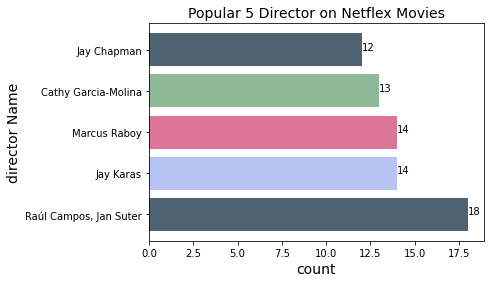

In [10]:
#the most popular director in netflex movie
spicific_type=data[data['type']=="Movie"]
common_direc=spicific_type["director"].value_counts()
print("the most popular director is:- ",common_direc.index[0])
x=common_direc[0:5]
y=common_direc.index[0:5]
plt.barh(y,width=x,color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title("Popular 5 Director on Netflex Movies",fontsize=14)
plt.xlabel('count',fontsize=14)
plt.ylabel('director Name',fontsize=14)
for xx,yy in zip(x,y):
  plt.text(xx,yy,xx)
plt.show()

the most popular director is:-  Alastair Fothergill


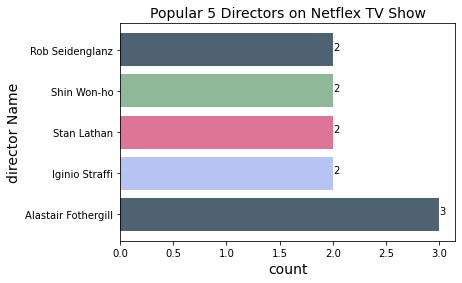

In [11]:
#the most popular director in tv show
spicific_type=data[data['type']=="TV Show"]
common_direc=spicific_type["director"].value_counts()
print("the most popular director is:- ",common_direc.index[0])
x=common_direc[0:5]
y=common_direc.index[0:5]
plt.barh(y,width=x,color= ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title("Popular 5 Directors on Netflex TV Show",fontsize=14)
plt.xlabel('count',fontsize=14)
plt.ylabel('director Name',fontsize=14)
for xx,yy in zip(x,y):
  plt.text(xx,yy,xx)
plt.show()

 Most popular country with netflex :- United States


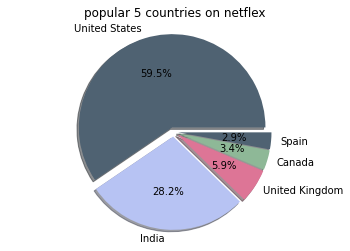

In [12]:
#popular country with netflex
countries=data["country"].value_counts()
print (' Most popular country with netflex :- {0}' .format(countries.index[0]))
plt.pie(countries[0:5],labels=countries.index[0:5],colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
,shadow=True,explode=[0.05]*5,autopct='%1.1f%%')
plt.title("popular 5 countries on netflex")
plt.axis("equal")
plt.show()  

 Most popular country on netflex Movie :- United States
 Most popular country with netflex  TV show:- United States


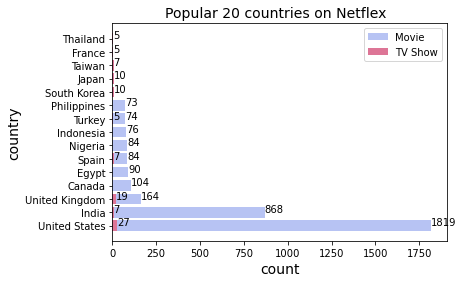

In [13]:
#popular country with netflex movies
spicific_type=data[data['type']=='Movie']
countries=spicific_type["country"].value_counts()
print (' Most popular country on netflex Movie :- {0}' .format(countries.index[0]))
x1=countries[0:10]
y1=countries.index[0:10]
b1=plt.barh(y1,width=x1,color = ['#B7C3F3'])
#popular country with netflex tv show
spicific_type=data[data['type']=='TV Show']
countries=spicific_type["country"].value_counts()
print (' Most popular country with netflex  TV show:- {0}' .format(countries.index[0]))
x=countries[0:10]
y=countries.index[0:10]
b2=plt.barh(y,width=x,color = ['#DD7596'])
plt.title("Popular 20 countries on Netflex  ",fontsize=14)
plt.xlabel('count',fontsize=14)
plt.ylabel('country',fontsize=14)
plt.legend([b1,b2], ["Movie","TV Show"])
for xx,yy ,zz,ww in zip(x,y,x1,y1):
  plt.text(xx,yy,xx)
  plt.text(zz,ww,zz)

plt.show()

In [14]:
#spilt date to analysis it
day=[]
month=[]
year=[]
for raw in data["date_added"].index[0:]:
    d=data['date_added'].loc[raw]
    day.append((d.split()[1]).split(",")[0])
    month.append(d.split()[0])
    year.append(d.split()[2])
data["month"]=month
data["day"]=day
data['year']=year


In [15]:
#analysis date
def date_ana(type):
    spicific_type=data[data['type']=='Movie']
    spicific_type2=data[data['type']=='TV Show']
    date=data[type].value_counts()
    spicific=spicific_type[type].value_counts()
    spicific2=spicific_type2[type].value_counts()
    print (' Most popular {1} with netflex :- {0}'.format(date.index[0],type))
    print (' Most popular {1} with netflex Movies :- {0}'.format(spicific.index[0],type))
    print (' Most popular {1} with netflex TV Show :- {0}'.format(spicific2.index[0],type))
    return (date,spicific,spicific2)


 Most popular month with netflex :- October
 Most popular month with netflex Movies :- October
 Most popular month with netflex TV Show :- December


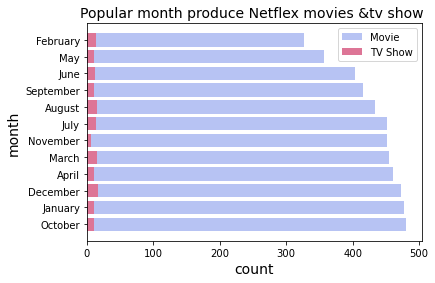

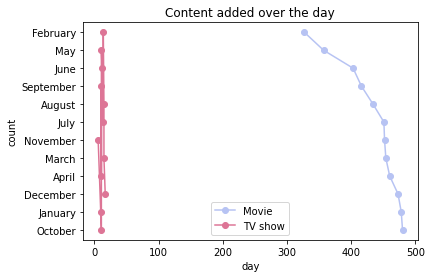

In [16]:
#analysis by month
mon,spicific_type,spicific_type2=date_ana("month")
x1=spicific_type
y1=spicific_type.index
b1=plt.barh(y1,width=x1,color = ['#B7C3F3'])
x2=spicific_type2
y2=spicific_type2.index
b2=plt.barh(y2,width=x2,color = ['#DD7596'])
plt.title("Popular month produce Netflex movies &tv show ",fontsize=14)
plt.xlabel('count',fontsize=14)
plt.ylabel('month',fontsize=14)
plt.legend([b1,b2], ["Movie","TV Show"])
plt.show()
ax=plt.axes()
ax.set(xlabel="day",ylabel="count",title="Content added over the day")
b1=plt.plot(x1,y1,marker="o",label="Movie",color = '#B7C3F3')
b2=plt.plot(x2,y2,marker="o",label="TV show",color = '#DD7596')
plt.legend()
plt.show()

 Most popular day with netflex :- 1
 Most popular day with netflex Movies :- 1
 Most popular day with netflex TV Show :- 15


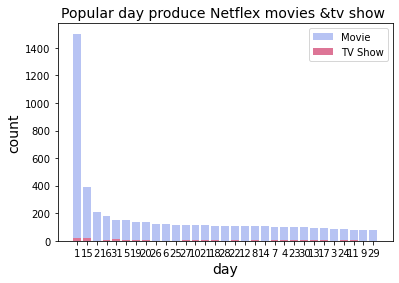

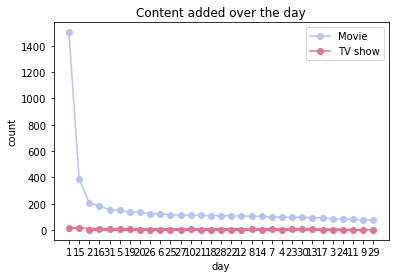

In [17]:
#analysis by day
day,spicific_type,spicific_type2=date_ana("day")
y1=spicific_type
x1=spicific_type.index
b2=plt.bar(x1,y1,color = ['#B7C3F3'])
y2=spicific_type2
x2=spicific_type2.index
b3=plt.bar(x2,y2,color = ['#DD7596'])
plt.title("Popular day produce Netflex movies &tv show ",fontsize=14)
plt.xlabel('day',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.legend([b2,b3], ["Movie","TV Show"])
plt.show()
ax=plt.axes()
ax.set(xlabel="day",ylabel="count",title="Content added over the day")
b1=plt.plot(x1,y1,marker="o",label="Movie",color = '#B7C3F3')
b2=plt.plot(x2,y2,marker="o",label="TV show",color = '#DD7596')
plt.legend()
plt.show()

 Most popular year with netflex :- 2019
 Most popular year with netflex Movies :- 2019
 Most popular year with netflex TV Show :- 2020


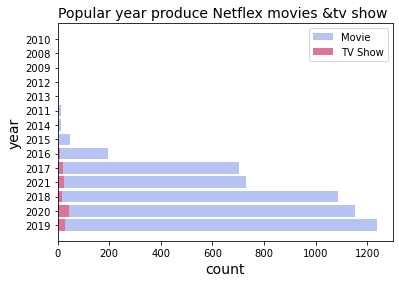

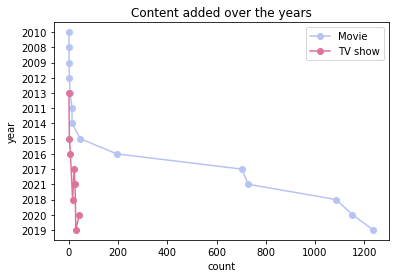

In [18]:
#analysis by day
year,spicific_type,spicific_type2=date_ana("year")
x1=spicific_type
y1=spicific_type.index
b2=plt.barh(y1,width=x1,color = ['#B7C3F3'])
x2=spicific_type2
y2=spicific_type2.index
b3=plt.barh(y2,width=x2,color = ['#DD7596'])
plt.title("Popular year produce Netflex movies &tv show ",fontsize=14)
plt.xlabel('count',fontsize=14)
plt.ylabel('year',fontsize=14)
plt.legend([b2,b3], ["Movie","TV Show"])
plt.show()
ax=plt.axes()
ax.set(xlabel="count",ylabel="year",title="Content added over the years")
b1=plt.plot(x1,y1,marker="o",label="Movie",color = '#B7C3F3')
b2=plt.plot(x2,y2,marker="o",label="TV show",color = '#DD7596')
plt.legend()
plt.show()

 Most common release year :- 2017


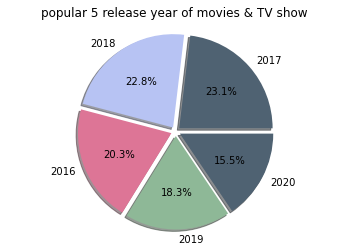

In [19]:
#most common release year
release_year=data["release_year"].value_counts()
print (' Most common release year :- {0}' .format(release_year.index[0]))
plt.pie(release_year[0:5],labels=release_year.index[0:5],colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
,shadow=True,explode=[0.05]*5,autopct='%1.1f%%')
plt.title("popular 5 release year of movies & TV show")
plt.axis("equal")
plt.show()


#### Movie ####
the earilest release year :- 1942
the newest release year   :- 2021
common release year       :- 2017

#### TV Show ####
the earilest release year :- 1990
the newest release year   :- 2021
common release year       :- 2020


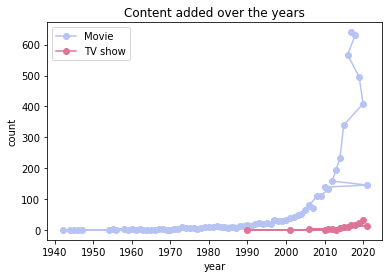

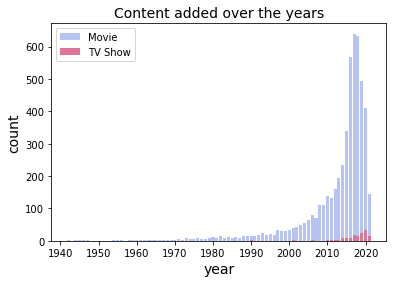

In [20]:
d1=data[data['type']=="Movie"]
print("#### Movie ####")
print("the earilest release year :- {0}".format(min(d1["release_year"])))
print("the newest release year   :- {0}".format(max(d1["release_year"])))
d1=d1["release_year"].value_counts()
print("common release year       :-",d1.index[0])
print()
x=d1.index
y1=d1.iloc[0:len(d1)].values
d2=data[data['type']=="TV Show"]
print("#### TV Show ####")
print("the earilest release year :- {0}".format(min(d2["release_year"])))
print("the newest release year   :- {0}".format(max(d2["release_year"])))
d2=d2["release_year"].value_counts()
print("common release year       :-",d2.index[0])
x2=d2.index
y2=d2.iloc[0:len(d1)].values
ax=plt.axes()
ax.set(xlabel="year",ylabel="count",title="Content added over the years")
b1=plt.plot(x,y1,marker="o",label="Movie",color = '#B7C3F3')
b2=plt.plot(x2,y2,marker="o",label="TV show",color = '#DD7596')
plt.legend()
plt.show()
b1=plt.bar(x,y1,color = ['#B7C3F3'])
b2=plt.bar(x2,y2,color = ['#DD7596'])
plt.title("Content added over the years",fontsize=14)
plt.xlabel('year',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.legend([b1,b2], ["Movie","TV Show"])
plt.show()

In [21]:
print("### show the oldest 10 movies  ###")
from IPython.display import display
earliest_movie=data[data["type"]=="Movie"]
earliest_movie=earliest_movie.sort_values("release_year")
movies_names = earliest_movie[["release_year", "title"]]
movies_names=movies_names.iloc[0:10]
display(movies_names)

### show the oldest 10 movies  ###


,release_year,title
8205,1942,The Battle of Midway
8640,1944,Tunisian Victory
7219,1945,Know Your Enemy - Japan
7294,1946,Let There Be Light
8587,1947,Thunderbolt
1699,1954,White Christmas
2375,1954,The Blazing Sun
7954,1955,Scandal in Sorrento
8506,1955,The Sign of Venus
7839,1955,Rebel Without a Cause


In [22]:
print("### show the newest 10 Movies  ###")
from IPython.display import display
earliest_movie=data[data["type"]=="Movie"]
earliest_movie=earliest_movie.sort_values("release_year")
movies_names = earliest_movie[["release_year", "title"]]
movies_names=movies_names.iloc[-10:]
display(movies_names)

### show the newest 10 Movies  ###


,release_year,title
1098,2021,Mandela
685,2021,Fatherhood
1105,2021,Concrete Cowboy
643,2021,The Seventh Day
636,2021,The Ice Road
1108,2021,Irul
1109,2021,Just Say Yes
1110,2021,Madame Claude
1089,2021,Two Distant Strangers
1311,2021,Namaste Wahala


In [23]:
print("### show the oldest 10  TV Show  ###")
from IPython.display import display
earliest_show=data[data["type"]=="TV Show"]
earliest_show=earliest_show.sort_values("release_year")
show_names = earliest_show[["release_year", "title"]]
show_names=show_names.iloc[0:10]
display(show_names)

### show the oldest 10  TV Show  ###


,release_year,title
7175,1990,Ken Burns: The Civil War
8214,2001,The Blue Planet: A Natural History of the Oceans
7748,2006,Planet Earth: The Complete Collection
3541,2006,Naruto
803,2006,Ouran High School Host Club
5096,2010,Fullmetal Alchemist: Brotherhood
6838,2011,Geronimo Stilton
6810,2011,Frozen Planet
316,2011,Office Girls
8293,2012,The Fear


In [24]:
print("### show  new 10  TV Show  ###")
from IPython.display import display
earliest_show=data[data["type"]=="TV Show"]
earliest_show=earliest_show.sort_values("release_year")
show_names = earliest_show[["release_year", "title"]]
show_names=show_names.iloc[-10:]
display(show_names)

### show  new 10  TV Show  ###


,release_year,title
380,2021,The Flash
1223,2021,Dealer
758,2021,Feel Good
879,2021,Halston
988,2021,Let's Fight Ghost
1173,2021,Men on a Mission
1293,2021,Pitta Kathalu
1432,2021,The Idhun Chronicles
737,2021,Trese
8,2021,The Great British Baking Show


#### Movie ####
common rating     :- TV-MA

#### TV Show ####
common reating       :- TV-MA


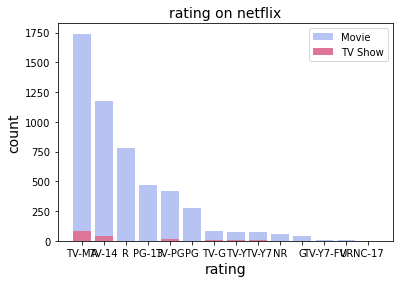

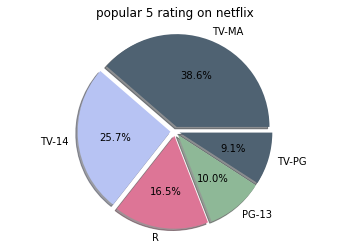

In [25]:
#analysis Movie and tv show  rating
d1=data[data['type']=="Movie"]
print("#### Movie ####")
d1=d1["rating"].value_counts()
print("common rating     :-",d1.index[0])
print()
x=d1.index
y1=d1.iloc[0:len(d1)].values
d2=data[data['type']=="TV Show"]
print("#### TV Show ####")
d2=d2["rating"].value_counts()
print("common reating       :-",d2.index[0])
x2=d2.index
y2=d2.iloc[0:len(d1)].values
b1=plt.bar(x,y1,color = ['#B7C3F3'])
b2=plt.bar(x2,y2,color = ['#DD7596'])
plt.title("rating on netflix",fontsize=14)
plt.xlabel('rating',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.legend([b1,b2], ["Movie","TV Show"])
plt.show()
d=data["rating"].value_counts()
plt.pie(d[0:5],labels=d.index[0:5],colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
,shadow=True,explode=[0.05]*5,autopct='%1.1f%%')
plt.title("popular 5 rating on netflix")
plt.axis("equal")#
plt.show()

In [26]:
print("###content for mature audiences  ###")
print("                                           ### MOVIE ###         ")
movie=data[data["type"]=="Movie"]
movie = movie.loc[movie["rating"]=="TV-MA",["release_year", "title","country"]]
movies=movie.iloc[0:10]
display(movies)

print("                                          ### TV SHOW ###         ")
show=data[data["type"]=="TV Show"]
show = show.loc[show["rating"]=="TV-MA",["release_year", "title","country"]]
show=show.iloc[0:10]
display(show)

###content for mature audiences  ###
                                           ### MOVIE ###         


,release_year,title,country
7,1993,Sankofa,"United States, Ghana, Burkina Faso, United Kin..."
12,2021,Je Suis Karl,"Germany, Czech Republic"
73,2018,King of Boys,Nigeria
84,2020,Omo Ghetto: the Saga,Nigeria
90,2019,Paradise Hills,"Spain, United States"
96,2018,If I Leave Here Tomorrow: A Film About Lynyrd ...,United States
140,2014,"El patrón, radiografía de un crimen","Argentina, Venezuela"
152,2016,Janoskians: Untold and Untrue,United States
159,2010,Love in a Puff,Hong Kong
188,2008,2 Alone in Paris,France


                                          ### TV SHOW ###         


,release_year,title,country
198,2021,King of Boys: The Return of the King,Nigeria
273,2021,Gone for Good,France
276,2021,Valeria,Spain
297,2021,Navarasa,India
503,2021,The Mire,Poland
681,2018,They've Gotta Have Us,United Kingdom
726,2014,Metallica: Some Kind of Monster,United States
737,2021,Trese,"Philippines, Singapore, Indonesia"
758,2021,Feel Good,United Kingdom
879,2021,Halston,United States


In [27]:
print("###  content require Parental Guidance   ###")
print("                                           ### MOVIE ###         ")
movie=data[data["type"]=="Movie"]
movie = movie.loc[movie["rating"]=="TV-PG",["release_year", "title","country"]]
movies=movie.iloc[0:10]
display(movies)

print("                                          ### TV SHOW ###         ")
show=data[data["type"]=="TV Show"]
show = show.loc[show["rating"]=="TV-PG",["release_year", "title","country"]]
show=show.iloc[0:10]
display(show)

###  content require Parental Guidance   ###
                                           ### MOVIE ###         


,release_year,title,country
53,2004,InuYasha the Movie 4: Fire on the Mystic Island,Japan
54,2001,InuYasha the Movie: Affections Touching Across...,Japan
57,2008,Naruto Shippûden the Movie: Bonds,Japan
58,2009,Naruto Shippûden the Movie: The Will of Fire,Japan
59,2007,Naruto Shippuden: The Movie,Japan
61,2005,Naruto the Movie 2: Legend of the Stone of Gelel,Japan
62,2006,Naruto the Movie 3: Guardians of the Crescent ...,Japan
63,2004,Naruto the Movie: Ninja Clash in the Land of Snow,Japan
116,2015,Dhanak,India
259,2018,Pahuna,"India, Nepal"


                                          ### TV SHOW ###         


,release_year,title,country
803,2006,Ouran High School Host Club,Japan
1042,2019,Garth Brooks: The Road I’m On,United States
1771,2017,Afronta! Facing It!,Brazil
3137,2012,Girls und Panzer,Japan
4262,2018,Watership Down,"United Kingdom, Ireland, United States"
5111,2017,Myths & Monsters,United Kingdom
5674,2012,Merlin,United Kingdom
6079,2017,Abnormal Summit,South Korea
6810,2011,Frozen Planet,"United Kingdom, United States, Spain, Germany,..."
7409,2018,Mars,United States


In [28]:
print("### Restricted Content ###")
print("                                           ### MOVIE ###         ")
movie=data[data["type"]=="Movie"]
movie = movie.loc[movie["rating"]=="R",["release_year", "title","country"]]
movies=movie.iloc[0:10]
display(movies)

print("                                          ### TV SHOW ###         ")
show=data[data["type"]=="TV Show"]
show = show.loc[show["rating"]=="R",["release_year", "title","country"]]
show=show.iloc[0:10]
print("NOT Found")

### Restricted Content ###
                                           ### MOVIE ###         


,release_year,title,country
46,2012,Safe House,"South Africa, United States, Japan"
48,2001,Training Day,United States
81,2021,Kate,United States
122,2003,In the Cut,"United Kingdom, Australia, France, United States"
131,1982,Blade Runner: The Final Cut,United States
133,2015,Chappie,"South Africa, United States"
135,1993,Cliffhanger,"United States, Italy, France, Japan"
136,2003,Cold Mountain,"United States, Italy, Romania, United Kingdom"
139,1989,Do the Right Thing,United States
141,2015,Extraction,"United States, United Kingdom, Canada"


                                          ### TV SHOW ###         
NOT Found


the most popular category on netflex is:-  Dramas, International Movies


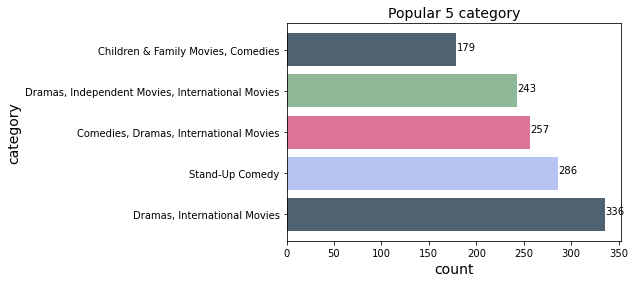

In [29]:
#listed in analysis
#the most popular director
common=data['listed_in'].value_counts()
print("the most popular category on netflex is:- ",common.index[0])
x=common[0:5]
y=common.index[0:5]
plt.barh(y,width=x,color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title("Popular 5 category",fontsize=14)
plt.xlabel('count',fontsize=14)
plt.ylabel('category',fontsize=14)
for xx,yy in zip(x,y):
  plt.text(xx,yy,xx)
plt.show()

the most common Movie duration is:- 94 min


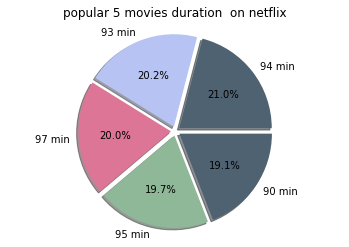

the most common TV Show duration is:- 1 Season


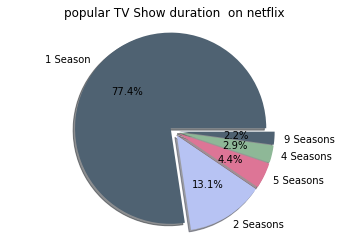

In [30]:
#duration analysis
movies_duration=data[data["type"]=="Movie"]
common_duration=movies_duration["duration"].value_counts()
print("the most common Movie duration is:-",common_duration.index[0])
plt.pie(common_duration[0:5],labels=common_duration.index[0:5],colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
,shadow=True,explode=[0.05]*5,autopct='%1.1f%%')
plt.title("popular 5 movies duration  on netflix")
plt.axis("equal")
plt.show()
show_duration=data[data["type"]=="TV Show"]
common_duration=show_duration["duration"].value_counts()
print("the most common TV Show duration is:-",common_duration.index[0])
plt.pie(common_duration[0:5],labels=common_duration.index[0:5],colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
,shadow=True,explode=[0.05]*5,autopct='%1.1f%%')
plt.title("popular TV Show duration  on netflix")
plt.axis("equal")
plt.show()

 Most popular listed_in with netflex :- Dramas, International Movies
 Most popular listed_in with netflex Movies :- Dramas, International Movies
 Most popular listed_in with netflex TV Show :- Crime TV Shows, International TV Shows, TV Dramas


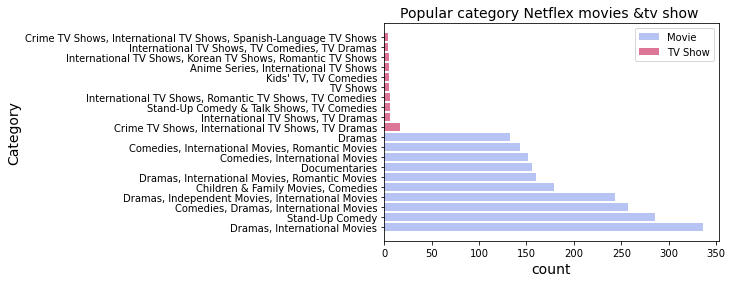

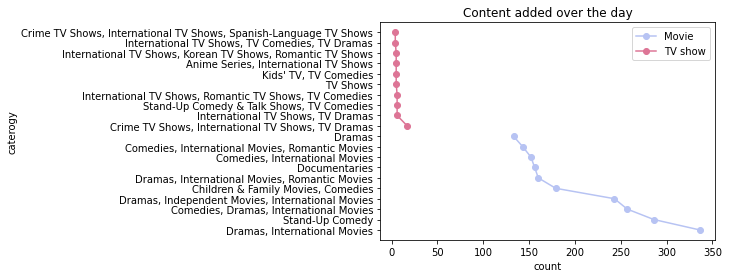

In [31]:
mon,spicific_type,spicific_type2=date_ana("listed_in")
x1=spicific_type[0:10]
y1=spicific_type.index[0:10]
b1=plt.barh(y1,width=x1,color = ['#B7C3F3'])
x2=spicific_type2[0:10]
y2=spicific_type2.index[0:10]
b2=plt.barh(y2,width=x2,color = ['#DD7596'])
plt.title("Popular category Netflex movies &tv show ",fontsize=14)
plt.xlabel('count',fontsize=14)
plt.ylabel('Category',fontsize=14)
plt.legend([b1,b2], ["Movie","TV Show"])
plt.show()
ax=plt.axes()
ax.set(xlabel="count",ylabel="caterogy",title="Content added over the day")
b1=plt.plot(x1,y1,marker="o",label="Movie",color = '#B7C3F3')
b2=plt.plot(x2,y2,marker="o",label="TV show",color = '#DD7596')
plt.legend()
plt.show()

In [32]:
print("### Stand_UP Comedy ###")
print("                                           ### MOVIE ###         ")
movie=data[data["type"]=="Movie"]
movie = movie.loc[movie["listed_in"]=="Stand-Up Comedy",["title","country","release_year" ]]
movies=movie.iloc[0:10]
display(movies)

print("                                          ### TV SHOW ###         ")
show=data[data["type"]=="TV Show"]
show = show.loc[show["listed_in"]=="Stand-Up Comedy & Talk Shows, TV Comedies",["title","country","release_year"]]
show=show.iloc[0:10]
display(show)

### Stand_UP Comedy ###
                                           ### MOVIE ###         


,title,country,release_year
278,Lokillo: Nothing's the Same,Colombia,2021
359,The Original Kings of Comedy,United States,2000
766,Alan Saldaña: Locked Up,Mexico,2021
826,Bo Burnham: Inside,United States,2021
838,Soy Rada: Serendipity,Argentina,2021
1172,Loyiso Gola: Unlearning,South Africa,2021
1189,Nate Bargatze: The Greatest Average American,United States,2021
1191,The Fluffy Movie,United States,2014
1198,RebellComedy: Straight Outta the Zoo,Germany,2021
1278,Brian Regan: On the Rocks,United States,2021


                                          ### TV SHOW ###         


,title,country,release_year
1530,Schulz Saves America,United States,2020
2507,Patton Oswalt: I Love Everything,United States,2020
3653,Comedians in Cars Getting Coffee,United States,2019
4284,Ellen DeGeneres: Relatable,United States,2018
5100,Dave Chappelle: Equanimity & The Bird Revelation,United States,2017
5562,Dave Chappelle,United States,2017


In [33]:
#cast analysis
def spilt_cast(country):
    country_data=data[data["country"]==country]
    country_cast={}
    for raw in country_data["cast"]:
        s=raw.split(",")
        for name in s:
            name=name.strip()
            if(name in country_cast):
                country_cast[name]+=1
            else:
                country_cast[name]=1
                
    return (country_cast)

The most  popular actor in the United States:- Adam Sandler


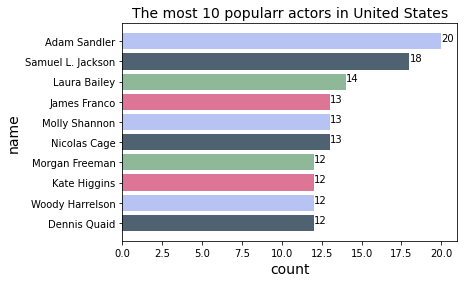

In [34]:
usa=spilt_cast("United States")
data_items = usa.items()
data_list = list(data_items)
df = pd.DataFrame(data_list)
df.columns =['Name', 'Movies_Count']
df=df.sort_values('Movies_Count')

print("The most  popular actor in the United States:-",df["Name"].iloc[-1])
x=df['Movies_Count'][-10:]
y=df['Name'][-10:]
plt.barh(y,width=x,color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title("The most 10 popularr actors in United States",fontsize=14)
plt.xlabel('count',fontsize=14)
plt.ylabel('name',fontsize=14)
for xx,yy in zip(x,y):
  plt.text(xx,yy,xx)
plt.show()


The most  popular actor in india:- Anupam Kher


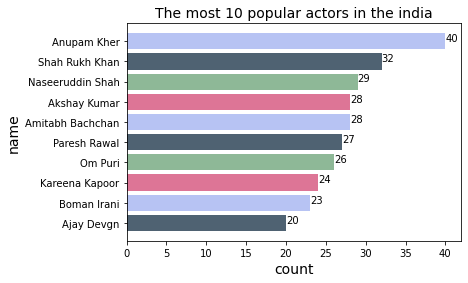

In [35]:
india=spilt_cast("India")
data_items = india.items()
data_list = list(data_items)
df = pd.DataFrame(data_list)
df.columns =['Name', 'Movies_Count']
df=df.sort_values('Movies_Count')

print("The most  popular actor in india:-",df["Name"].iloc[-1])
x=df['Movies_Count'][-10:]
y=df['Name'][-10:]
plt.barh(y,width=x,color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title("The most 10 popular actors in the india",fontsize=14)
plt.xlabel('count',fontsize=14)
plt.ylabel('name',fontsize=14)
for xx,yy in zip(x,y):
  plt.text(xx,yy,xx)
plt.show()

The most  popular actor in india:- John Cleese


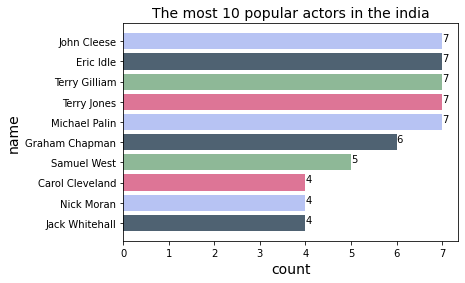

In [36]:
UK=spilt_cast("United Kingdom")
data_items = UK.items()
data_list = list(data_items)
df = pd.DataFrame(data_list)
df.columns =['Name', 'Movies_Count']
df=df.sort_values('Movies_Count')

print("The most  popular actor in india:-",df["Name"].iloc[-1])
x=df['Movies_Count'][-10:]
y=df['Name'][-10:]
plt.barh(y,width=x,color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title("The most 10 popular actors in the india",fontsize=14)
plt.xlabel('count',fontsize=14)
plt.ylabel('name',fontsize=14)
for xx,yy in zip(x,y):
  plt.text(xx,yy,xx)
plt.show()